In [1]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as signal
from PIL import Image

In [2]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/imagen-as.png
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/black-sky.png
!wget https://github.com/newtonis/tps_imagenes/blob/master/tp2/filtros/eight.tif
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/moon.png
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/high-boost.png
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/high-boost.png
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/zebra.png
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/unsharp.
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/tunel-good.png

--2020-08-31 04:03:13--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/imagen-as.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15498 (15K) [image/png]
Saving to: ‘imagen-as.png.4’

imagen-as.png.4     100%[===================>]  15.13K  --.-KB/s    in 0.01s   

2020-08-31 04:03:13 (1.50 MB/s) - ‘imagen-as.png.4’ saved [15498/15498]

--2020-08-31 04:03:13--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/filtros/black-sky.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50074 (49K) [i

(177, 142)


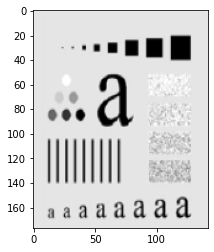

In [3]:
imagen_as = cv2.imread('imagen-as.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_as, cmap='gray', vmin=0, vmax=255)
print(imagen_as.shape)

In [4]:
def low_pass_filter(img, dim=3, type="prom"):
    assert dim%2 != 0
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2
    def compute_mask(sub_img, x, y):
      val = 0
      if type == "prom":
        mask = np.full((dim, dim), 1)
      if type == "pond":
        mask = np.array([
                         [1, 2, 1],
                         [2, 4 ,2],
                         [1, 2, 1]
                        ])
      for i in range(dim):
        for j in range(dim):
          val += mask[i][j] * sub_img[i+x][j+y]
      return val / dim**2

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)
    
    return new_img


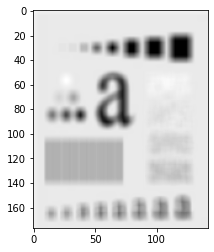

In [5]:
mask = np.full((5, 5), 1)
imagen_as_prom = low_pass_filter(imagen_as, dim=7)
plt.imshow(imagen_as_prom, cmap="gray")

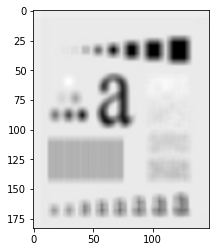

In [6]:
mask = np.full((7, 7), 1)
a = signal.convolve2d(imagen_as, mask, mode="full", boundary="symm")
plt.imshow(a, cmap="gray")

(320, 238)


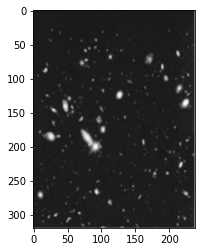

In [7]:
black_sky = cv2.imread('black-sky.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(black_sky , cmap='gray', vmin=0, vmax=255)
print(black_sky .shape)

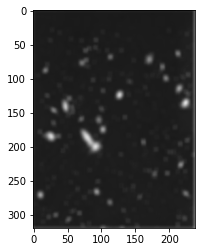

In [8]:
black_sky_blur = low_pass_filter(black_sky, 7)
plt.imshow(black_sky_blur , cmap='gray', vmin=0, vmax=255)


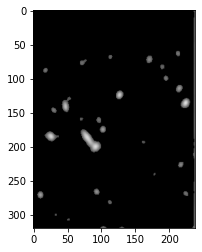

In [9]:
def apply_threshold(img, percentage):
  new_img = np.zeros((img.shape[0], img.shape[1]))
  assert 0 < percentage < 1
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] > percentage*255:
          new_img[i][j] = img[i][j]
  return new_img

black_sky_blur_th = apply_threshold(black_sky_blur, 0.3)
plt.imshow(black_sky_blur_th , cmap='gray', vmin=0, vmax=255)


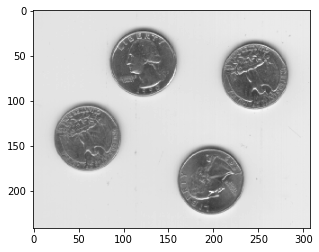

In [10]:
img = Image.open('eight.tif')
coins = np.array(img)
plt.imshow(coins, cmap='gray', vmin=0, vmax=255)

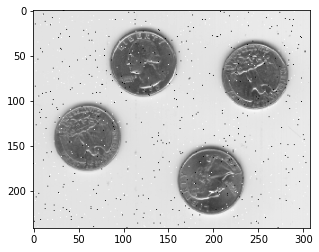

In [11]:
def salt_and_pepper_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

coins_with_salt_and_pepper = salt_and_pepper_noise(coins, 0.005)
plt.imshow(coins_with_salt_and_pepper, cmap='gray', vmin=0, vmax=255)

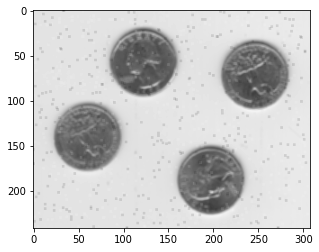

In [12]:
coins_sp_low_pass = low_pass_filter(coins_with_salt_and_pepper, dim=3, type="prom")
plt.imshow(coins_sp_low_pass, cmap='gray', vmin=0, vmax=255)

In [13]:
def median_filter(img, dim=3):
    assert dim%2 != 0
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2

    def compute_mask(sub_img, x, y):
      val = 0
      mask = sub_img[x:x+dim, y:y+dim]
      mask = mask.flatten()
      mask = sorted(mask)
      while len(mask) > 1:
        if len(mask) > 1:
          mask = mask[1:]
        if len(mask) > 1:
          mask = mask[:-1]
      return mask[0]

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)

    return new_img

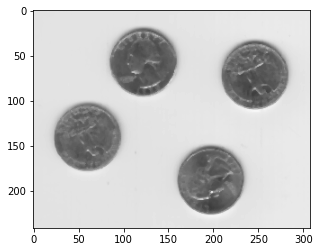

In [14]:
coins_sp_median = median_filter(coins_with_salt_and_pepper, 3)
plt.imshow(coins_sp_median, cmap='gray', vmin=0, vmax=255)

(852, 827)


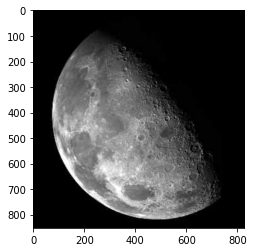

In [15]:
moon = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(moon, cmap='gray', vmin=0, vmax=255)
print(moon.shape)

In [16]:
  def laplaciano_high_pass(img, dim=3):
    assert dim%2 != 0
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2
    print(pad)
    def compute_mask(sub_img, x, y):
      val = 0
      mask = np.array([
                      [1, 1, 1],
                      [1, -8 ,1],
                      [1, 1, 1]
                      ])
      for i in range(dim):
        for j in range(dim):
          val += mask[i][j] * sub_img[i+x][j+y]
      return val

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)
    
    return new_img


1


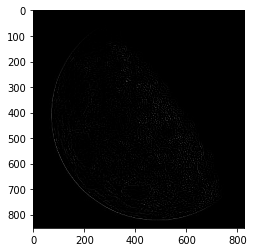

In [17]:
moon_laplaciano = laplaciano_high_pass(moon)
plt.imshow(moon_laplaciano, cmap='gray', vmin=0, vmax=255)

In [18]:
  def laplaciano_con_fondo(img, dim=3):
    assert dim%2 != 0
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2
    print(pad)
    def compute_mask(sub_img, x, y):
      val = 0
      mask = np.array([
                      [-1, -1, -1],
                      [-1, 9 , -1],
                      [-1, -1, -1]
                      ])
      for i in range(dim):
        for j in range(dim):
          val += mask[i][j] * sub_img[i+x][j+y]
      return val

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)
    
    return new_img

1


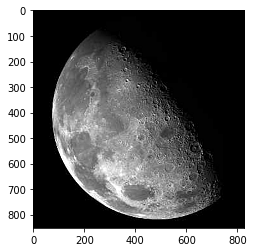

In [19]:
moon_laplaciano_con_fondo = laplaciano_con_fondo(moon)
plt.imshow(moon_laplaciano_con_fondo, cmap='gray', vmin=0, vmax=255)

In [20]:
  def high_boost_filter(img, A=1, dim=3):
    assert dim%2 != 0
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2
    print(pad)
    def compute_mask(sub_img, x, y):
      val = 0
      mask = np.array([
                      [-1, -1, -1],
                      [-1, 8 + A , -1],
                      [-1, -1, -1]
                      ])
      for i in range(dim):
        for j in range(dim):
          val += mask[i][j] * sub_img[i+x][j+y]
      return val

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)
    
    return new_img

(247, 210)


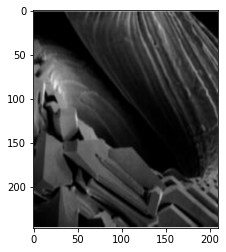

In [21]:
high_boost_example = cv2.imread('high-boost.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(high_boost_example, cmap='gray', vmin=0, vmax=255)
print(high_boost_example.shape)

1
(247, 210)


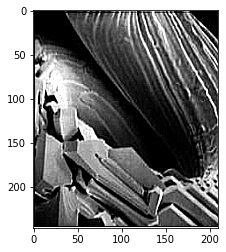

In [22]:
high_boost_example_1_7 = high_boost_filter(high_boost_example, A=1.7)
plt.imshow(high_boost_example_1_7, cmap='gray', vmin=0, vmax=255)
print(high_boost_example_1_7.shape)

(674, 605)


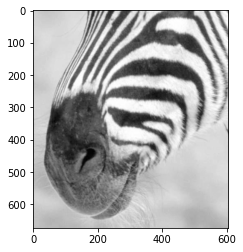

In [23]:
zebra = cv2.imread('zebra.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(zebra, cmap='gray', vmin=0, vmax=255)
print(zebra.shape)

In [24]:
  def sobel(img, dim=3, direction="x"):
    assert dim%2 != 0
    mask = np.array([
                    [-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]
                    ])
    new_img = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    pad = dim // 2
    def compute_mask(sub_img, x, y):
      val = 0
      mask = np.array([
                      [-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]
                      ])
      if direction == "y":
        mask = mask.T
      for i in range(dim):
        for j in range(dim):
          val += mask[i][j] * sub_img[i+x][j+y]
      return val

    dummy_img = np.pad(img, pad, mode="edge")
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        new_img[i][j] = compute_mask(dummy_img, i, j)
    
    return new_img

(674, 605)


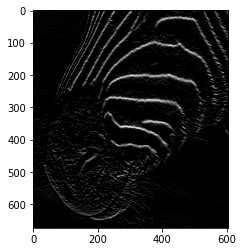

In [25]:
zebra_sobel_x = sobel(zebra)
plt.imshow(zebra_sobel_x, cmap='gray', vmin=0, vmax=255)
print(zebra_sobel_x.shape)

(674, 605)


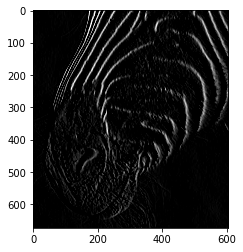

In [26]:
zebra_sobel_y = sobel(zebra, direction="y")
plt.imshow(zebra_sobel_y, cmap='gray', vmin=0, vmax=255)
print(zebra_sobel_y.shape)

(307, 407)


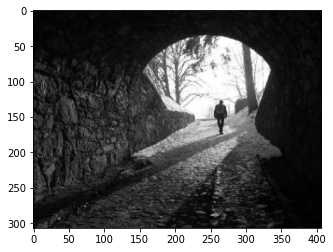

In [27]:
tunel = cv2.imread('tunel-good.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(tunel, cmap='gray', vmin=0, vmax=255)
print(tunel.shape)

In [28]:
def read_filter_coeff_matrix(filename):
    import numpy as np
    f = open(filename, "r")
    disk = []
    arr = []
    for i,x in enumerate(f):
        if i == 0:
            m,n = [int(el) for el in x.split(" ")]
            disk = np.zeros((m,n))
        else:
            arr.append(float(x))
        
    for i in range(m):
        for j in range(n):
            disk[i][j] = arr[i*m+j]
    return disk

In [29]:
pasa_altos = read_filter_coeff_matrix("unsharp.txt")
print(pasa_altos.shape)

(3, 3)


In [30]:
def homomorfic(img):
  gamma_h = 1.1
  gamma_l = 0.3
  img = np.array(img, dtype="float")
  x, y = np.meshgrid(np.linspace(-1,1,img.shape[1]), np.linspace(-1,1,img.shape[0]))
  d = np.sqrt(x*x+y*y)
  sigma, mu = 1.0, 0.0
  g = (gamma_h - gamma_l) * (1 - np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )) + gamma_l
  img[::] += 1
  img_ln_h = np.fft.fftshift(np.fft.fft2(np.log(img)))
  for i in range(img_ln_h.shape[0]):
    for j in range(img_ln_h.shape[1]):
      img_ln_h[i][j] *= g[i][j]
  return np.exp(np.real(np.fft.ifft2(np.fft.ifftshift(img_ln_h))))


[[6.14397445 6.3857955  6.93290068 ... 7.83914632 8.18746921 6.84573111]
 [1.82848203 1.66948516 1.30935215 ... 1.24791092 1.08780095 1.24922966]
 [1.37317713 1.53278185 2.15914001 ... 1.86059972 2.17821236 1.70361837]
 ...
 [1.85475221 2.0709524  2.60593876 ... 1.16475792 1.57839229 1.25091177]
 [2.84317743 2.55923855 2.28411685 ... 0.89700718 1.93549042 1.22688856]
 [2.54093087 1.99408369 1.41221236 ... 0.67247722 0.61411254 1.53522481]]


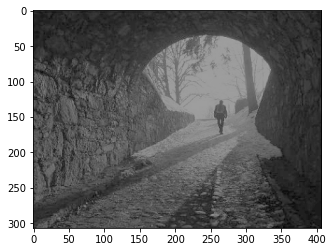

In [31]:
new_img = homomorfic(tunel)
print(new_img)
plt.imshow(new_img, cmap="gray")